In [1]:

# Step 1: Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay



In [2]:
# Step 2: Load the dataset
df = pd.read_csv("synthetic_eye_color_dataset.csv")
df.head()

# Step 3: Encode SNP genotypes (categorical to numeric)
snp_columns = df.columns[:-1]  # All columns except 'eye_color'
label_encoders = {}

for col in snp_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for possible inverse_transform

# Step 4: Encode target label (eye_color)
target_encoder = LabelEncoder()
df["eye_color_encoded"] = target_encoder.fit_transform(df["eye_color"])

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)


=== Random Forest ===
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        blue       1.00      1.00      1.00       319
       brown       1.00      1.00      1.00      1047
       green       1.00      1.00      1.00       634

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



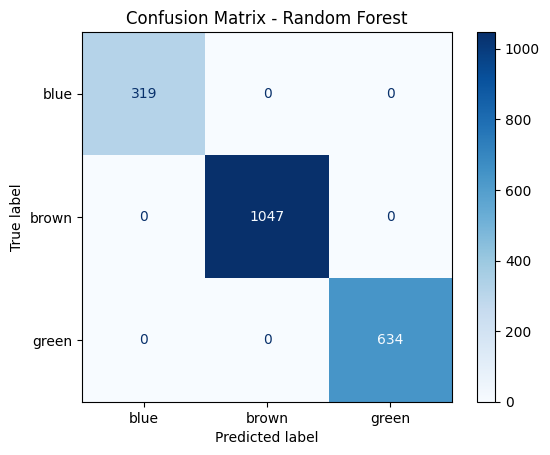

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:04:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        blue       1.00      1.00      1.00       319
       brown       1.00      1.00      1.00      1047
       green       1.00      1.00      1.00       634

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



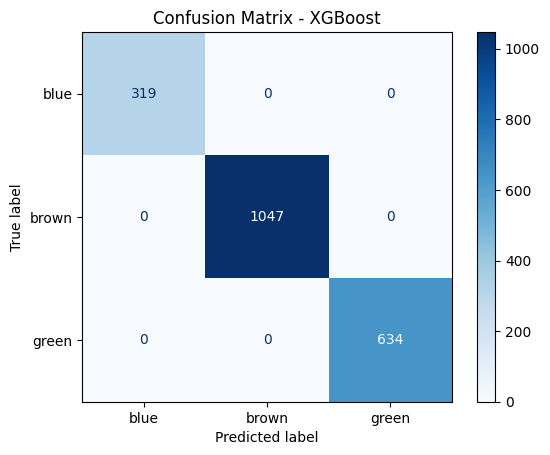


=== SVM ===
Accuracy: 0.7065
Classification Report:
              precision    recall  f1-score   support

        blue       0.82      1.00      0.90       319
       brown       0.67      0.85      0.75      1047
       green       0.71      0.32      0.44       634

    accuracy                           0.71      2000
   macro avg       0.73      0.72      0.70      2000
weighted avg       0.71      0.71      0.68      2000



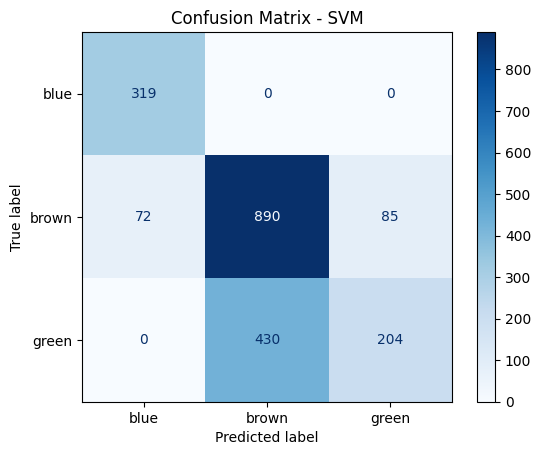

In [16]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

# Train, predict, evaluate
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=target_encoder.classes_,
        cmap='Blues', normalize=None
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()

/tmp/ipython-input-5-1041923133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="eye_color", palette="Set2")


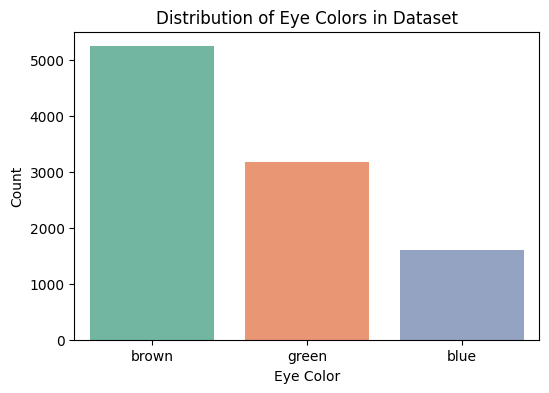

In [5]:
# 📊 Distribution of Eye Colors
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="eye_color", palette="Set2")
plt.title("Distribution of Eye Colors in Dataset")
plt.xlabel("Eye Color")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-6-1460719661.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")


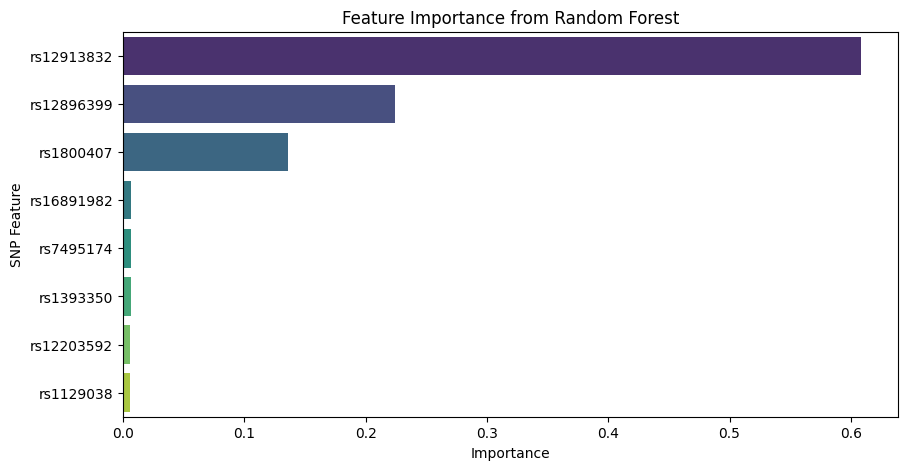

In [6]:
# 🔍 Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": snp_columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("SNP Feature")
plt.show()


In [7]:
# 🎯 Predict Eye Color with Probabilities

def predict_with_probabilities(model, encoders, target_encoder):
    print("\n🔍 Predict Eye Color with Probabilities")

    user_input = {}
    for snp, encoder in encoders.items():
        valid_genotypes = list(encoder.classes_)
        print(f"\n{snp} - Valid genotypes: {valid_genotypes}")
        while True:
            value = input(f"Enter genotype for {snp}: ").strip().upper()
            if value in valid_genotypes:
                user_input[snp] = encoder.transform([value])[0]
                break
            else:
                print(f"⚠️ Invalid input. Please enter one of {valid_genotypes}.")

    user_df = pd.DataFrame([user_input])
    prediction = model.predict(user_df)[0]
    probs = model.predict_proba(user_df)[0]
    predicted_label = target_encoder.inverse_transform([prediction])[0]

    print(f"\n🎯 Predicted Eye Color: {predicted_label}")
    print("\n📈 Prediction Probabilities:")
    for idx, prob in enumerate(probs):
        label = target_encoder.inverse_transform([idx])[0]
        print(f"{label}: {round(prob*100, 2)}%")

# Call it
predict_with_probabilities(model, label_encoders, target_encoder)



🔍 Predict Eye Color with Probabilities

rs12913832 - Valid genotypes: ['AA', 'AG', 'GG']
Enter genotype for rs12913832: AA

rs1800407 - Valid genotypes: ['CC', 'CT', 'TT']
Enter genotype for rs1800407: CT

rs12896399 - Valid genotypes: ['AA', 'GA', 'GG']
Enter genotype for rs12896399: GA

rs16891982 - Valid genotypes: ['CC', 'CG', 'GG']
Enter genotype for rs16891982: CG

rs12203592 - Valid genotypes: ['CC', 'TC', 'TT']
Enter genotype for rs12203592: TC

rs1393350 - Valid genotypes: ['AA', 'GA', 'GG']
Enter genotype for rs1393350: AA

rs7495174 - Valid genotypes: ['AA', 'AG', 'GG']
Enter genotype for rs7495174: AG

rs1129038 - Valid genotypes: ['CC', 'TC', 'TT']
Enter genotype for rs1129038: TC

🎯 Predicted Eye Color: brown

📈 Prediction Probabilities:
blue: 0.0%
brown: 100.0%
green: 0.0%


In [8]:
# 💾 Save the trained model and encoders for deployment
import joblib

joblib.dump(model, "eye_color_rf_model.pkl")
joblib.dump(label_encoders, "snp_label_encoders.pkl")
joblib.dump(target_encoder, "eye_color_target_encoder.pkl")

print("✅ Model and encoders saved.")


✅ Model and encoders saved.


In [9]:
# 📝 Save a sample prediction to CSV
sample_input = X_test.iloc[0:1]
sample_prediction = model.predict(sample_input)[0]
sample_label = target_encoder.inverse_transform([sample_prediction])[0]

result_df = sample_input.copy()
result_df["Predicted Eye Color"] = sample_label
result_df.to_csv("sample_prediction.csv", index=False)

print("📁 Sample prediction saved to 'sample_prediction.csv'")


📁 Sample prediction saved to 'sample_prediction.csv'
